In [5]:
%matplotlib inline
import numpy as np
import pandas as pd
import json
from scipy import stats, integrate
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns
sns.set(color_codes=True)

In [7]:
with open('../../result/epa_expansion/nn_result_github_all', 'r') as fp:
    github = json.load(fp)
with open('../../result/epa_expansion/nn_result_twitter_all', 'r') as fp:
    twitter = json.load(fp)

In [38]:
def get_tokenset(words_list):
    from nltk.corpus import wordnet as wn 
    words_list_pos = {
        wn.VERB: [],
        wn.NOUN: [],
        wn.ADV: [],
        wn.ADJ: []
    }
    
    for word in words_list:
        for pos in words_list_pos.keys():
            if word in set(w.name().split('.', 1)[0] for w in wn.synsets(word, pos=pos)):
                words_list_pos[pos].append(word)

    return words_list_pos


def tokenset_comp():
    words_list_pos = get_tokenset(set(github.keys()) & set(twitter.keys()))
    for pos in words_list_pos.keys():
        tokenlist = words_list_pos[pos]
        github_list = np.array([github[t] for t in tokenlist])
        twitter_list = np.array([twitter[t] for t in tokenlist])
        for axis in range(0, 3):
            plt.figure()
            plt.title('%s %s' % (pos, axis))
            sns.distplot(github_list[:, axis], color='r')
            # sns.distplot(twitter_list[:, axis], norm_hist=True, color='b')
        print('===== %s %s =====' % (pos, len(tokenlist)))
        print(np.mean(github_list, axis=0))
        print(np.mean(np.abs(github_list), axis=0))
        print(np.std(github_list, axis=0))

        print(np.mean(twitter_list, axis=0))
        print(np.mean(np.abs(twitter_list), axis=0))
        print(np.std(twitter_list, axis=0))

/home/jyuwei/.local/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


===== a 3594 =====
[ 0.26090602  0.72377176 -1.10001894]
[0.44363655 0.75002317 1.101793  ]
[0.49430692 0.37830858 0.26543041]
[ 0.15654574  0.62959196 -0.99257745]
[0.53159789 0.7043317  1.0031925 ]
[0.66955892 0.49164217 0.36870216]
===== n 10224 =====
[ 0.38560889  0.74802225 -1.12690498]
[0.45748492 0.76020743 1.12916038]
[0.37774737 0.28394159 0.24461653]
[ 0.31997448  0.6578128  -1.08610425]
[0.52185046 0.70201863 1.09501012]
[0.56333257 0.39689668 0.34687073]
===== r 782 =====
[ 0.33730439  0.76593643 -1.2154236 ]
[0.46083456 0.7798851  1.2154236 ]
[0.45792002 0.34837006 0.21846925]
[ 0.12571625  0.59761763 -1.09195661]
[0.4728824  0.66705054 1.09938012]
[0.61403469 0.45040042 0.32527032]
===== v 3338 =====
[ 0.35746912  0.78113875 -1.09727519]
[0.47556126 0.80347649 1.10126438]
[0.46031543 0.36396655 0.27291372]
[ 0.27040945  0.68998255 -1.06525027]
[0.56094307 0.75087902 1.08176469]
[0.65309923 0.48136067 0.38865268]


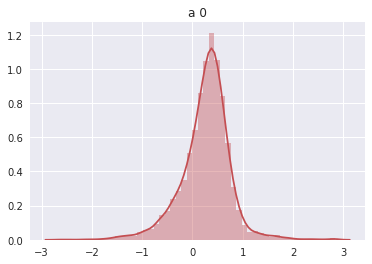

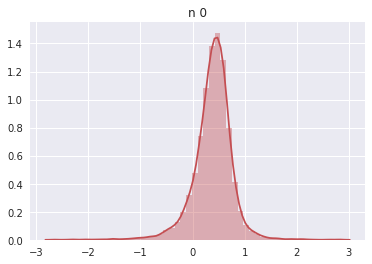

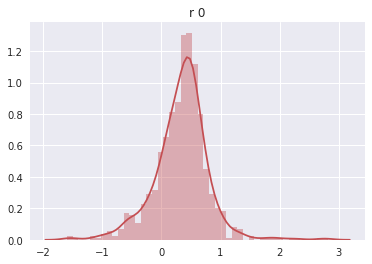

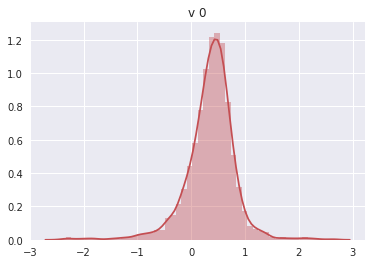

In [39]:
tokenset_comp()